Első lépésként importálom az adatokat a pandas package segítségével és megtekintem az első pár sorát az adatoknak. Ebben a lépésben történik a CRISP-DM módszertan szerinti "Adat megértése" fázis. 

In [33]:
import pandas as pd

data = pd.read_csv('Phishing_Legitimate_full.csv')

data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
6797,6798,1,0,5,134,8,0,0,0,0,...,1,0,0,1,-1,1,1,0,1,0
5339,5340,2,1,2,71,6,1,0,0,0,...,0,0,0,1,0,0,1,1,1,0
7622,7623,3,1,4,63,0,0,0,1,0,...,0,0,0,1,0,1,1,0,1,0
3413,3414,2,1,8,157,0,0,0,0,1,...,0,0,0,1,-1,1,-1,1,1,1
7984,7985,1,0,3,60,3,0,0,0,0,...,1,0,0,1,0,-1,1,-1,1,0


Ezek után szeretnék elvégezni néhány tesztet az adatokon, hogy kiderüljön milyen hibái lehetnek, mint például hiányzó adatok, rossz adattípusok a magyarázó kategóriáknál, felesleges oszlopok vagy túl nagy asszimetria. Ez a lépés a módszertan szerint az "Adatok előkészítése" fázisnak felel meg.

In [12]:
data.isna().sum()


id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [11]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

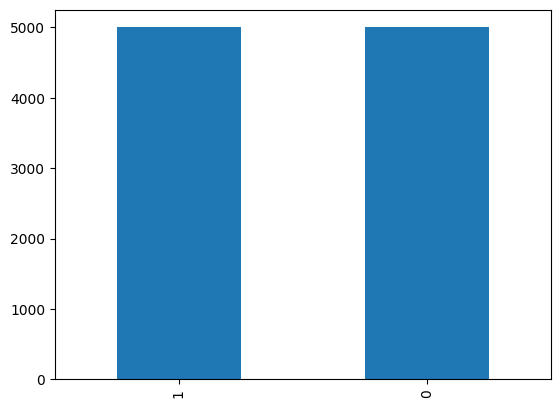

In [14]:
import matplotlib.pyplot as plt

data['CLASS_LABEL'].value_counts().plot(kind='bar')

Láthatjuk, hogy ugyanannyi mintánk van phishing weblapokról, mint igazi oldalakról, tehát ez egy tökéletesen kiegyensúlyozott adatbázis. 

In [24]:
from sdv.tabular import GaussianCopula

model = GaussianCopula(primary_key='id')
model.fit(data)

sample = model.sample(10000)
sample.sample(10)

c:\Users\allma\AppData\Local\Programs\Python\Python38\lib\site-packages\rdt\transformers\numerical.py:100: UserWarning: No rounding scheme detected for column 'PctExtHyperlinks'. Data will not be rounded.
  warnings.warn(
c:\Users\allma\AppData\Local\Programs\Python\Python38\lib\site-packages\rdt\transformers\numerical.py:100: UserWarning: No rounding scheme detected for column 'PctExtResourceUrls'. Data will not be rounded.
  warnings.warn(
c:\Users\allma\AppData\Local\Programs\Python\Python38\lib\site-packages\rdt\transformers\numerical.py:100: UserWarning: No rounding scheme detected for column 'PctNullSelfRedirectHyperlinks'. Data will not be rounded.
  warnings.warn(
c:\Users\allma\AppData\Local\Programs\Python\Python38\lib\site-packages\copulas\univariate\truncated_gaussian.py:45: RuntimeWarning: invalid value encountered in scalar divide
  a = (self.min - loc) / scale
c:\Users\allma\AppData\Local\Programs\Python\Python38\lib\site-packages\copulas\univariate\truncated_gaussian.py

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
9308,9308,3,1,2,62,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9740,9740,1,0,3,61,7,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2742,2742,2,0,3,82,4,0,0,0,1,...,0,0,0,1,-1,-1,1,0,0,1
657,657,2,1,3,66,2,1,0,0,0,...,1,0,0,1,0,-1,1,-1,-1,1
4256,4256,4,1,2,110,1,0,0,0,1,...,0,0,0,1,0,-1,1,0,0,0
5122,5122,2,2,0,31,3,0,0,0,1,...,0,0,0,1,1,1,0,0,1,0
1254,1254,1,0,4,76,2,0,0,0,1,...,1,0,0,1,0,-1,0,0,-1,0
1326,1326,3,1,3,80,1,1,0,0,2,...,0,0,0,1,1,0,1,0,-1,0
1619,1619,3,1,6,87,2,0,0,0,3,...,0,0,0,1,0,1,1,0,0,1
1135,1135,1,0,5,75,5,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [23]:
sample['CLASS_LABEL'].value_counts()

1    5013
0    4987
Name: CLASS_LABEL, dtype: int64

In [40]:
from sdmetrics.reports.single_table import QualityReport
import pyarrow 

table= pyarrow.Table.from_pandas(data)

metadata_dict = table.schema.metadata

print(table.schema.metadata)
report = QualityReport()
report.generate(data, sample, metadata_dict)

{b'pandas': b'{"index_columns": [{"kind": "range", "name": null, "start": 0, "stop": 10000, "step": 1}], "column_indexes": [{"name": null, "field_name": null, "pandas_type": "unicode", "numpy_type": "object", "metadata": {"encoding": "UTF-8"}}], "columns": [{"name": "id", "field_name": "id", "pandas_type": "int64", "numpy_type": "int64", "metadata": null}, {"name": "NumDots", "field_name": "NumDots", "pandas_type": "int64", "numpy_type": "int64", "metadata": null}, {"name": "SubdomainLevel", "field_name": "SubdomainLevel", "pandas_type": "int64", "numpy_type": "int64", "metadata": null}, {"name": "PathLevel", "field_name": "PathLevel", "pandas_type": "int64", "numpy_type": "int64", "metadata": null}, {"name": "UrlLength", "field_name": "UrlLength", "pandas_type": "int64", "numpy_type": "int64", "metadata": null}, {"name": "NumDash", "field_name": "NumDash", "pandas_type": "int64", "numpy_type": "int64", "metadata": null}, {"name": "NumDashInHostname", "field_name": "NumDashInHostname",